<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8


In this project, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. You may use a .ipynb file instead of .py.

You must add descriptions to each of the sections.  ***You must explain what your code is doing*** (either in comments or via the supported HTML inside of a .ipynb file).

### Data Resources
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

# Database Connection

**(Optional Extra Credit)**

Import the data you've selected into a SQL database of your choosing.  Connect your database to Python.

Resources:

*   https://dev.mysql.com/doc/workbench/en/wb-admin-export-import-table.html 
*   https://medium.com/@tattwei46/how-to-use-python-with-mysql-79304bee8753
*   https://downloads.mysql.com/docs/connector-python-en.pdf
*   https://datatofish.com/how-to-connect-python-to-sql-server-using-pyodbc/



**Project Description: The Census Income Data Set

- Background
The data called adult.csv was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

- Objective
This is a classic classification problem in which the task is to make prediction whether a person makes over $50K a year given the features such as age, working class type, educational level, countries, sex and hours work per week to name a few.
Income is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains)

- Process
1) From https://www.kaggle.com/uciml/adult-census-income, the adult.csv file was downloaded to my computer and imported to mysql database
2) Python was then connected to the database and data was then munged and wrangled to an acceptable form for further analysis
3) EDA was then performed via statistical analytical tools to better undertand the underlying data
4) Machine learning algorithms; XGBoost and Random Forest with Data Visualizations were concurently performed & analyzed
5) Summary & Conclusion were provided as a final synthesis

- Data structure 
1) 14 potential X-features Matrix (NxN Matrix)
2) 1 Response or Dependent variable (Nx1 Y Vector) called income 

- Relevant papers
Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996. (PDF)

# Load Libraries

In [1]:
# Importing the required libraries
import mysql.connector as mc
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import unittest
import requests
import json
import seaborn as sb
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import plotly.express as px
import chart_studio
from statistics import stdev 
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split as tts
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")

# Connection to mysql database

In [2]:
cnx = mc.connect(user='root', password='Steffi2011!!!',
 host='127.0.0.1',
 database='adult')

mycursor = cnx.cursor()

mycursor.execute("SELECT * FROM adult")

myresult = mycursor.fetchall()

type(myresult) # The data come into Python as list of tuples


list

In [3]:
#converting list to Dataframe
df = pd.DataFrame(myresult) 
#renaming columns in Dataframe
df.columns = ['age', 'workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']
#now we have dataframe with easy to understand headers
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info(); #Peeking at the datastructure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df['income'].value_counts() # Determining if we have imbalance situation or not

<=50K    24720
>50K      7841
Name: income, dtype: int64

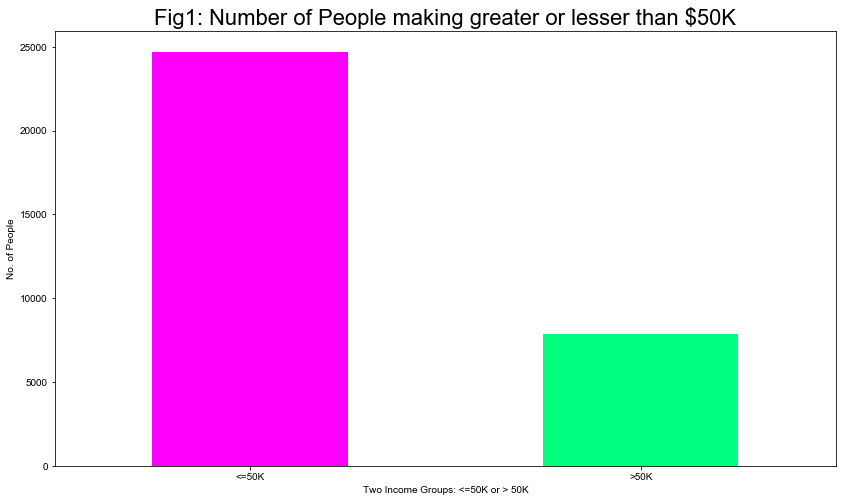

In [6]:
# Barplot to visualize incomes above and lower than $50K
my_colors = 'magenta','springgreen'
ax = df['income'].value_counts().plot(kind='bar',figsize=(14,8),color=my_colors)
ax.set_xlabel("Two Income Groups: <=50K or > 50K")
ax.set_ylabel("No. of People")
sns.set(style = 'darkgrid')
plt.title("Fig1: Number of People making greater or lesser than $50K", fontsize=22);
plt.xticks(rotation=0)
plt.show()

Observation 1a:
- The response variable, is exhibiting a slight imbalance; meaning individuals making more than 50K was only 24% of the sample size.  This will be addressed later when we perform some data cleansing.  
- There were ? issues in certain columns of the dataset as well and that will be dealt with as well

# Data Wrangling/Cleaning

In [7]:
#Checking for Nulls or missing data in the columns
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Observation 1b:  No Nulls were found in the dataset

In [8]:
# This Code will Count the occuring of the '?' in all the columns
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
1836
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education.num
0
The Value Counts of ? in marital.status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital.gain
0
The Value Counts of ? in capital.loss
0
The Value Counts of ? in hours.per.week
0
The Value Counts of ? in native.country
583
The Value Counts of ? in income
0


Observation 1c:  
1) ? occurs in 3 columns; workclass, occupation and native country
2) workclass and occupation contains the same ? issue
corrective action: Remove rows of ? in both workclass and occupation
3) native country also contains ?
corrective action: Because people making >50K is already in short supply, we have to first check to see if removing ? in these columns may aggravate imbalances more, see analysis below and then make a judgment call from there

In [9]:
#count the number of individuals making >50K in the native column to see if dropping it will make imbalance issue worse?
native_country_questionmark= df[df['native.country']=='?']
native_country_questionmark['income'].value_counts()


<=50K    437
>50K     146
Name: income, dtype: int64

Observation 1d:
By removing individuals "?" in the native.country columns reduces the percentage of people making >50K to 23% from 24%.  This is a slight decrease which we are willing to absorb as we will deal with imbalanceness using other techniques later

In [10]:
#removing rows containing "?" in native.country, workclass & occupation columns 
df1=df[(df.workclass != "?") & (df.occupation!= "?")]
df2 = df1[df1['native.country']!='?']
#check again for exisitence of "?"
for i in df2.columns:
    t = df2[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
0
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education.num
0
The Value Counts of ? in marital.status
0
The Value Counts of ? in occupation
0
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital.gain
0
The Value Counts of ? in capital.loss
0
The Value Counts of ? in hours.per.week
0
The Value Counts of ? in native.country
0
The Value Counts of ? in income
0


In [11]:
#Taking a glimpse of the "cleaned up" dataset
df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K



# Data Exploration  (EDA)


The maximum age is 90
The minimum age is 17
The median age is 37.0
The avg age is 38.437901995888865
The Std Dev. age is 13.134664776856322


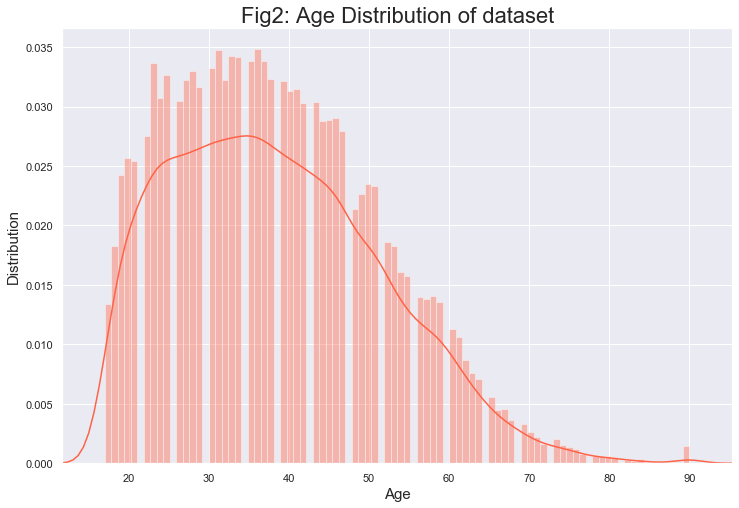

In [12]:
# Distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'darkgrid')

sns.distplot(df2['age'], bins = 90, color = 'tomato')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)
plt.title('Fig2: Age Distribution of dataset', fontsize=22)

print ("The maximum age is", df2['age'].max())
print ("The minimum age is", df2['age'].min())
print ("The median age is", df2['age'].median())
print ("The avg age is", df2['age'].mean())
print ("The Std Dev. age is", df2['age'].std())

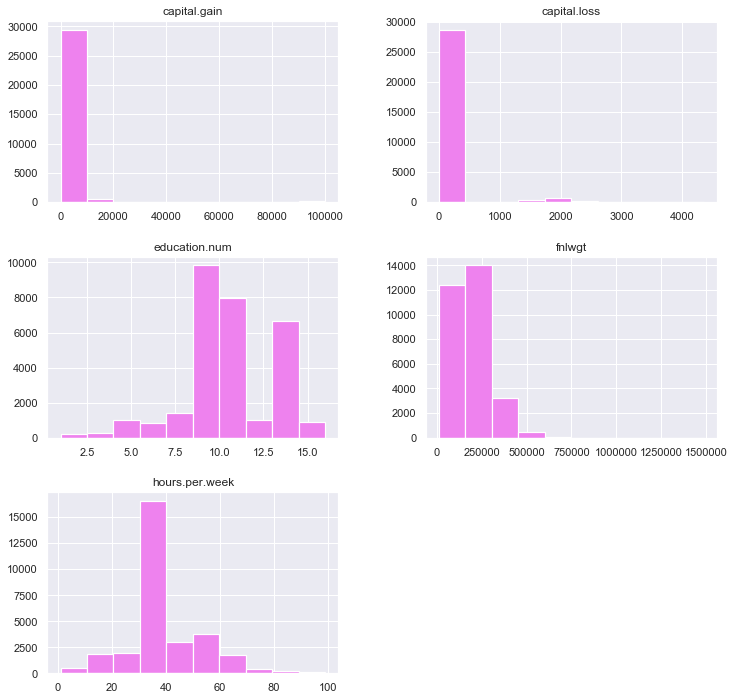

In [13]:
# Histograms of remaining numerical Features of the Dataset
df3=df2.iloc[:, 1:14]
distribution = df3.hist(edgecolor = 'white', linewidth = 1.2, color = 'violet')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Observation 2a:
- Age was the most "well-distributed" with a slight right skewness and right tail sticking out due to a 90 yr old worker
- Education and hours work per week is not too badly behaved while capital gains/loss were very lopped sided; meaning it exhibited high concentration of certain numbers 

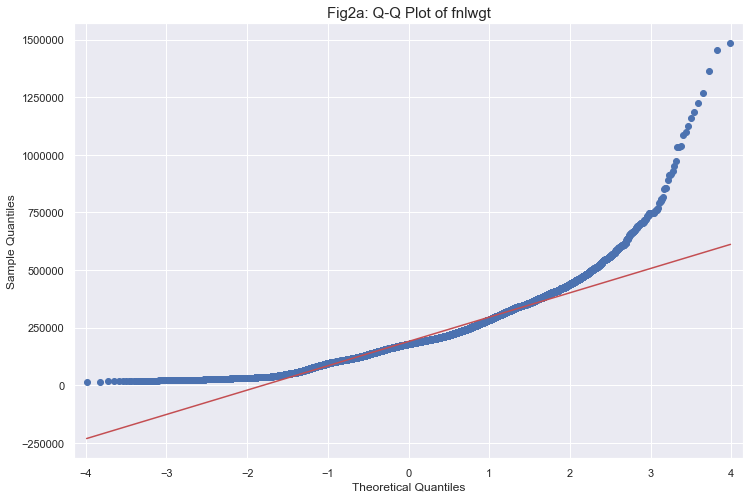

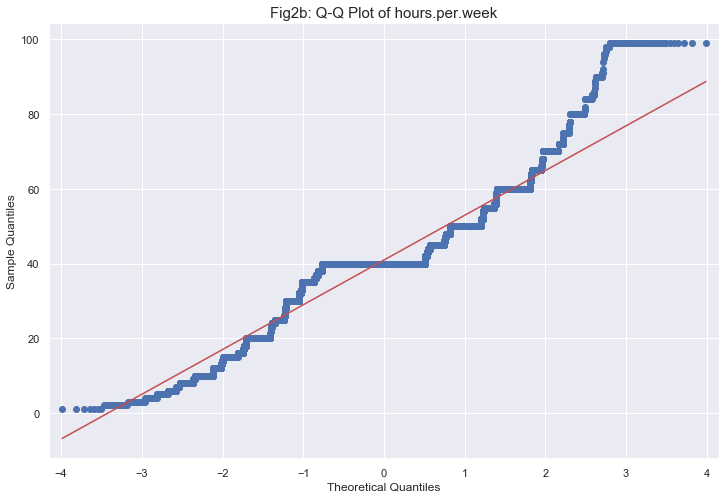

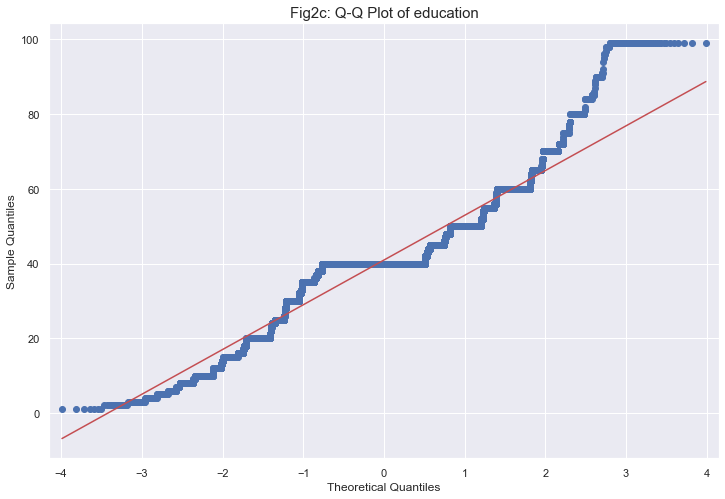

In [14]:
# q-q plot to check for normality of fnlwgt, hour.per.week & education.num
df_fnlwgt=df2.loc[:, 'fnlwgt']
qqplot(df_fnlwgt, line='s')
plt.title('Fig2a: Q-Q Plot of fnlwgt', fontsize=15)
df_hours=df2.loc[:, 'hours.per.week']
qqplot(df_hours, line='s')
plt.title('Fig2b: Q-Q Plot of hours.per.week', fontsize=15)
df_edu=df2.loc[:, 'education.num']
qqplot(df_hours, line='s')
plt.title('Fig2c: Q-Q Plot of education', fontsize=15)
plt.show()

Observation 2b:
- As expected education & hours work were kind of "normal" while fnlwgt was off due to outliers
- Didn't bothered to check Capital gains/loss because the histograms shown were too lumpy as illustrated in its histograms

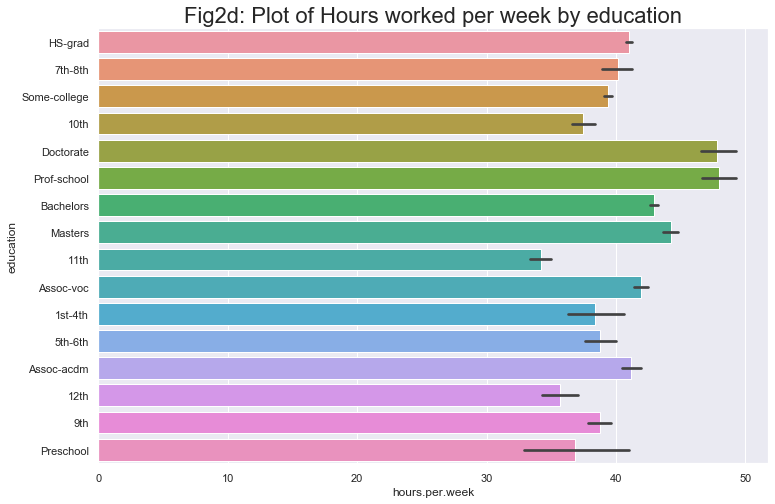

In [15]:
# Let's see the number of hours per week by educational levels
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df2['hours.per.week'], y = df2['education'], data = df2)
plt.title('Fig2d: Plot of Hours worked per week by education', fontsize=22)
plt.setp(sns_grad.get_xticklabels(), rotation=0);

Observation 2c:
- This was interesting & unexpected whereby both Doctorate, Prof-School (tied) followed by Masters degreed folks were working more hours than less educated people.  I had assumed less-educated folks worked longer hours but the data suggested differently 
- Male as the traditional bread winner in many cultures and societies clocked in more hours per week than their female counterpart

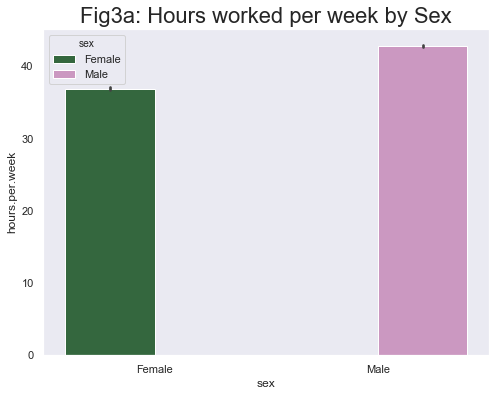

In [16]:
# hours per week worked between male and female 
sns.set(style = 'dark', rc={'figure.figsize':(8,6)})
plt.title('Fig3a: Hours worked per week by Sex', fontsize=22)
sns.barplot(x = df2['sex'], y = df2['hours.per.week'], data = df2,hue = 'sex', palette = 'cubehelix');

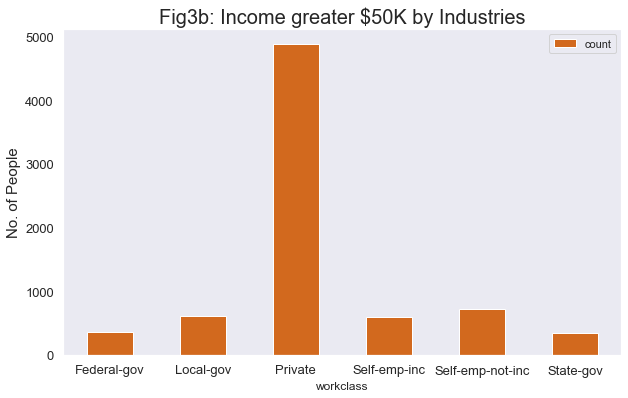

In [17]:
#grouped by working class and people making > $50K
df_workclass1 = df2[df2['income'] == '>50K'].groupby(['workclass']).size().reset_index(name='count')  
ax = df_workclass1.plot.bar(x='workclass', y='count', rot=0, figsize=(10,6), color="chocolate", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Fig3b: Income greater $50K by Industries", fontsize=20)
ax.set_ylabel("No. of People", fontsize=15);
plt.show()

Observation 2d:
- It pays to work in the private industry world-wide

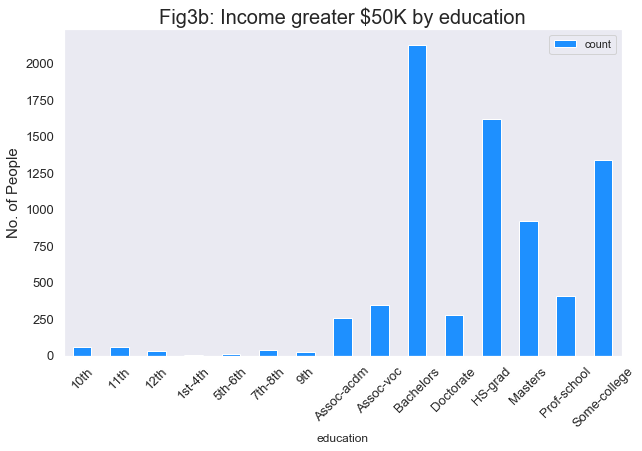

In [18]:
#grouped by educational levels and people making > $50K
df_education = df2[df2['income'] == '>50K'].groupby(['education']).size().reset_index(name='count')  
ax = df_education.plot.bar(x='education', y='count', rot=0, figsize=(10,6), color="dodgerblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Fig3b: Income greater $50K by education", fontsize=20)
plt.xticks(rotation=45)
ax.set_ylabel("No. of People", fontsize=15);
plt.show()

Observation 2c:
- this definitely surprising!!  Bachelors by far make more money than Doctorate or Masters degreed people. Maybe this pursuit of MSDS in CUNY is NOT what it's all crack out to be? (Just Kidding)

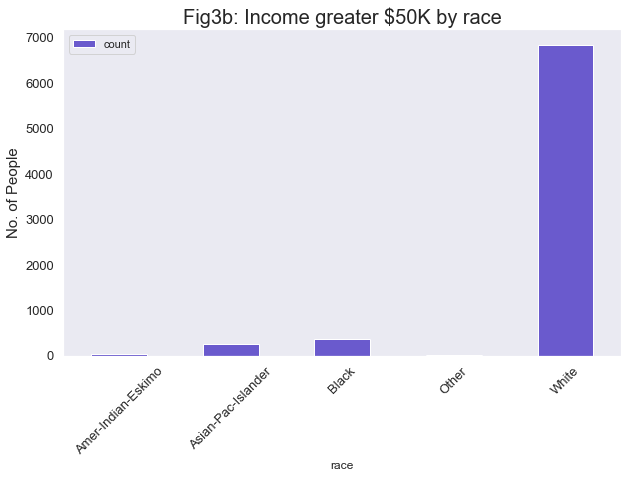

In [19]:
#grouped by race and people making > $50K
df_race = df2[df2['income'] == '>50K'].groupby(['race']).size().reset_index(name='count')  
ax = df_race.plot.bar(x='race', y='count', rot=0, figsize=(10,6), color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Fig3b: Income greater $50K by race", fontsize=20)
plt.xticks(rotation=45)
ax.set_ylabel("No. of People", fontsize=15);
plt.show()

Observation 2d:
- this definitely NOT surprising.  Whites by far make more money than any other race.  But interesting enough Blacks is 2nd while Asia Pacific Islander was a close third

Text(0.5, 1.0, 'Fig3f: race and education')

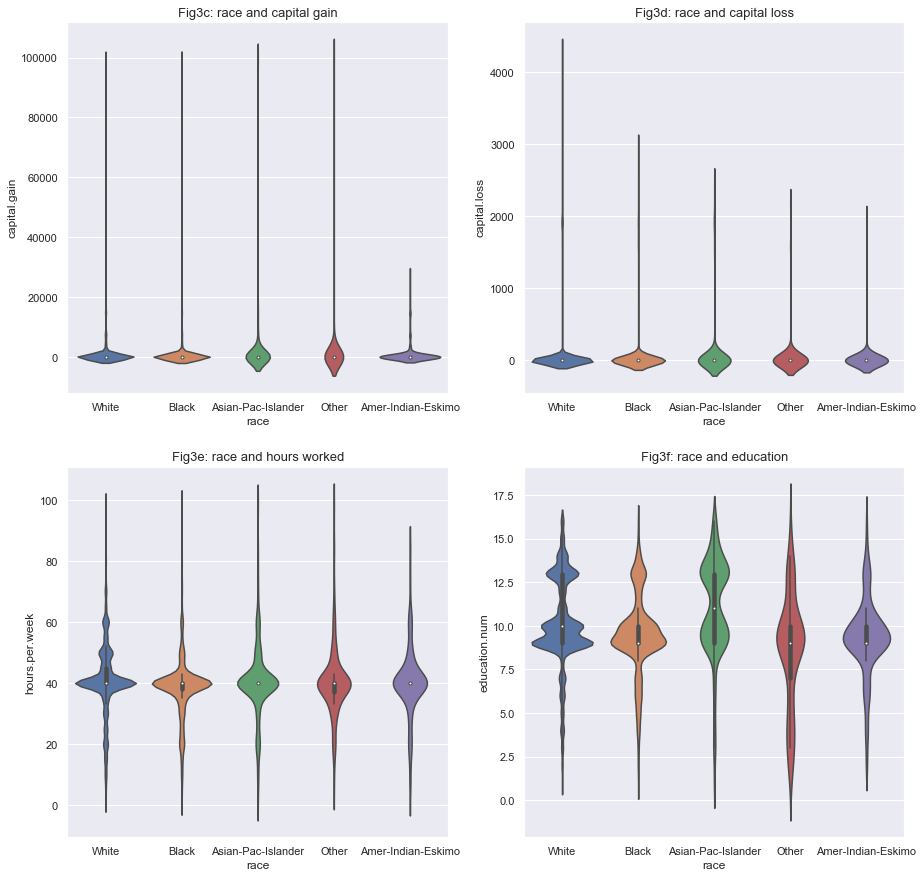

In [20]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This boxplots show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df2['race'], y = df2['capital.gain'], data = df2);
plt.title('Fig3c: race and capital gain', fontsize=13)
plt.subplot(2,2,2)
sns.violinplot(x = df2['race'], y = df2['capital.loss'], data = df2);
plt.title('Fig3d: race and capital loss', fontsize=13)
plt.subplot(2,2,3)
sns.violinplot(x = df2['race'], y = df2['hours.per.week'], data = df2);
plt.title('Fig3e: race and hours worked', fontsize=13)
plt.subplot(2,2,4)
sns.violinplot(x = df2['race'], y = df2['education.num'], data = df2);
plt.title('Fig3f: race and education', fontsize=13)

Observation 2e:
By digging deeper into race and we see interesting tidbits within different races?
1) Whites and Blacks had the most widely dispersed capital gains and loss
2) Number of hours worked per week was similarly distributed amongst differnt races; averaging 40-hour work shifts
3) Asian-Pac, Whites and Blacks exhibited distinctive bimodalities in their educational distributions.  Lastly, Asian-Pac as a race has higher levels of education; confirming anecdotal evidence that Asian people study more!


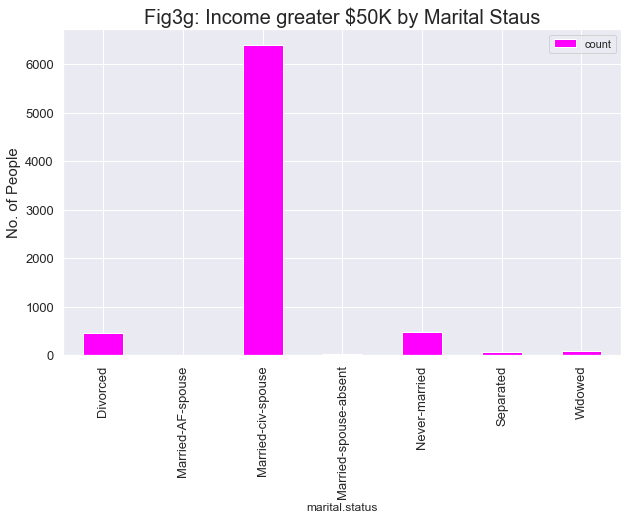

In [21]:
#grouped by marital relathionships and people making > $50K
df_race = df2[df2['income'] == '>50K'].groupby(['marital.status']).size().reset_index(name='count')  
ax = df_race.plot.bar(x='marital.status', y='count', rot=0, figsize=(10,6), color="fuchsia", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Fig3g: Income greater $50K by Marital Staus", fontsize=20)
plt.xticks(rotation=90)
ax.set_ylabel("No. of People", fontsize=15);
plt.show()

Observation 2f:
Word of wisdom for all singles out there, it actually pays to be married (happily married?)

In [22]:
#Showing countries with folks making more than $50K
df_countrymost = df2[df2['income'] == '>50K'].groupby(['native.country']).size().reset_index(name='count') 
df_countrymost.loc[df_countrymost ['count'].idxmax()]

native.country    United-States
count                      6995
Name: 36, dtype: object

Observation 2f:
The US has the most folks earning > $50K, so much so that id dwarfs other countries.  The next analysis removed USA in order to have a better relative comparision of earning power in the rest of the world

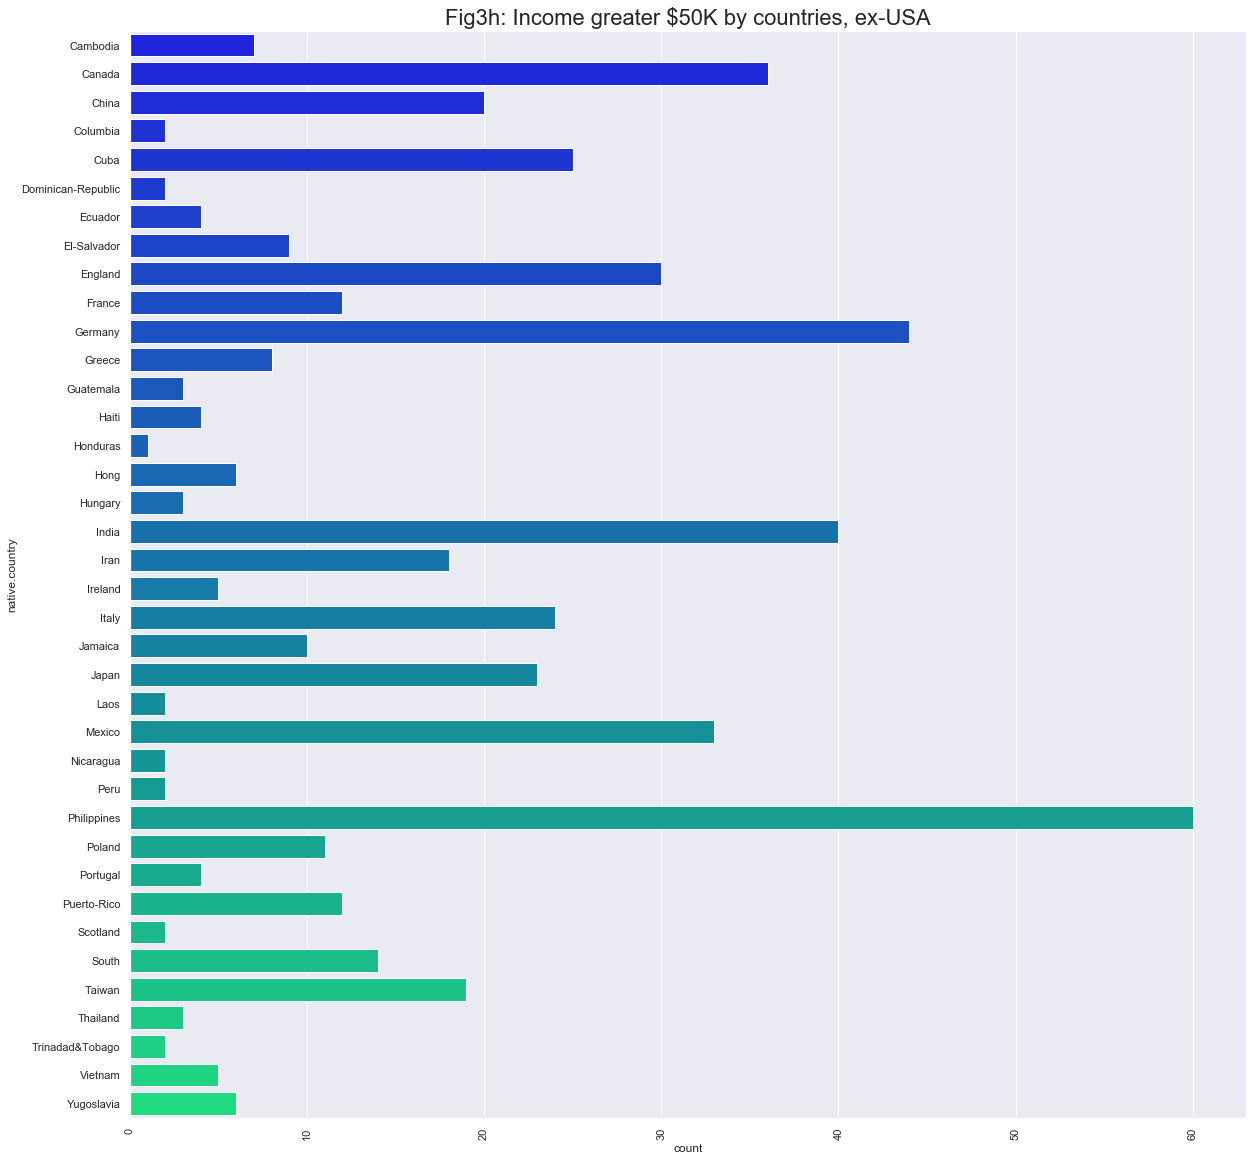

In [35]:
#Countries with folks making more than $50K outside of USA
plt.rcParams['figure.figsize'] = [20,10]
# Dropping the United States Row as there's a disparity between US and other Countries
df_countrymore=df2[df2['income'] == '>50K'].groupby(['native.country']).size().reset_index(name='count') 
no_US=df_countrymore.loc[(df_countrymore['native.country'] != 'United-States')]

plt.rcParams['figure.figsize'] = [20,20]
sns_ = sns.barplot(x = no_US['count'], y = no_US['native.country'], data = no_US, palette = 'winter')

plt.title("Fig3h: Income greater $50K by countries, ex-USA", fontsize=22);
plt.setp(sns_.get_xticklabels(), rotation = 90);

Observation 2g:
1) Outside of US with folks earning > $50K, the Phillipines have the next highest followed by Germany, India and then Canada
2) This is surprising as I would have assumed Germany, Canada and then Phillipines.  Could be old data from 1994 perhaps?

# Machine Learning Section

- Preprocessing: Making a copy of the dataframe, df2 so that I can convert the y-vector to ones or zeros without messing up the original dataframe
- One hot coding the y-vector column:  converting >$50K equals 1

In [36]:
# Copying the eda adult dataFrame and reseting the index
df_model = df2.copy()

df_model = df_model.reset_index(drop = True)
df_model.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [38]:
df_model.describe()#statistical summary of dataframe to be modelled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [68]:
# Changing the income column into Numerical Value
df_model['income'] = [1 if x =='>50K' else 0 for x in df_model['income']] 

In [66]:
df_model.tail()#peeking at target variable to ensure that it was one-hot encoded correctly

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
18179,40,2,116632,11,9,0,11,1,4,1,0,0,60,38,1
26126,34,2,346034,9,13,4,7,1,4,1,0,0,40,7,0
22945,43,2,180599,11,9,2,2,0,4,1,0,0,55,38,0
28185,54,2,425804,15,10,4,3,1,4,0,0,0,45,38,1
79,39,2,348521,15,10,2,4,0,4,1,0,2415,99,38,1


In [67]:
df_model['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

Observation 3:
- After removing ? from the 3 columns the ratio of folks making greater than 50K remains at 24%.  We shall see if adjustments needed to be made to balance out the y-vector column


# Label Hot encoding remaining categerical features in df_model dataframe

In [42]:
categorical_features = list(df_model.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_model[feature] = label_encoder_feat[feature].fit_transform(df_model[feature])

df_model.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
1,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
2,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
3,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
4,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


In [44]:
df_model = shuffle(df_model)

# Splitting the data set into train and test set
features_ = df_model.drop(columns = ['income', 'education.num'])#remoing education.num column because it is redundant 
target = df_model['income']
X_train, X_test, y_train, y_test = tts(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (21113, 13)
Test data set size :  (9049, 13)


# 1) Boosted Gradient Descent - Feature Importance

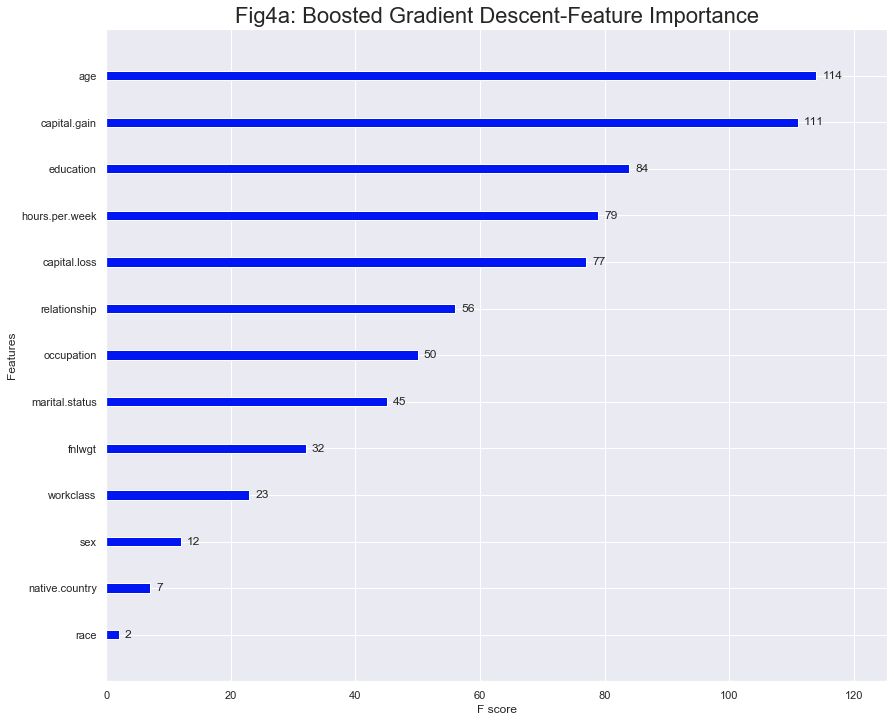

In [45]:
# Plotting the feature importances using the Boosted Gradient Descent
# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
sns.set_palette("winter", 10)
plot_importance(model_importance);
plt.title("Fig4a: Boosted Gradient Descent-Feature Importance", fontsize=22);

# 2) Random Forest - Feature Importance

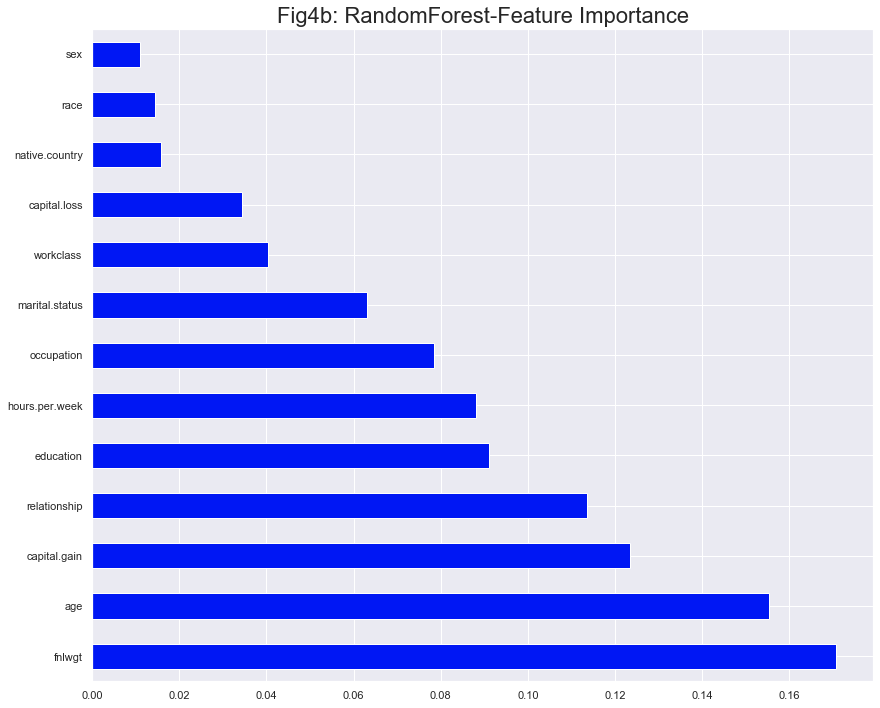

In [46]:
# random forest for feature importance on a classification problem
# get importance
forest= RandomForestClassifier()
forest.fit(X_train, y_train)
importances = forest.feature_importances_

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
feat_importances = pd.Series(forest.feature_importances_ , index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Fig4b: RandomForest-Feature Importance", fontsize=22);
plt.show();


Observation 4:
Because different algorithms calculate feature importances differently; I am only showing as to how features for one alogrithm may differ in importance from another as is the case in Fig4a vs. Fig4b.

**XGBoost - Importance features
- Not surprisinly the top 3 features of importance to an individual's income levels were:  Age, Capital gains and education
- Surprisingly though, race is NOT an important part of the feature.  In fact, it came in dead last in XGBoost

**Random Forest - Importance features
- Age, Capital gains, relationship and education were found to be top 4 but surprisingly fnlwgt came in first.  
- Again race is NOT an important part of the feature.  In fact, it ranked lowly in Random Forest


# Modelling

Model-1 Random Forest Classifier
Model-2 Boosted Gradient Descent

In [47]:
# Training the model_1
R_forest = RandomForestClassifier(n_estimators = 200)
model_1 = R_forest.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of Random Forest, model1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of Random Forest, model1 : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of Random Forest, model1 :  0.8484915460271854
The f1 score of Random Forest, model1 :  0.6745786850225493


In [48]:
# Training the model 2
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model_2 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of XGBoost model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of XGBoost model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of XGBoost model 2 :  0.8609791137142225
The f1 score of XGBoost model 2 :  0.7035815268614516


# Analysis of the model performances & Classification Reports

In [49]:
list_pred = [pred_1, pred_2]
model_names = ["Random Forest Classifier", "Boosted Gradient Descent"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6771
        >50K       0.73      0.62      0.67      2278

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049

Classification Report of  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6771
        >50K       0.76      0.66      0.70      2278

    accuracy                           0.86      9049
   macro avg       0.82      0.79      0.81      9049
weighted avg       0.86      0.86      0.86      9049



# Consfusion Matrix for the Classifiers

In [50]:
for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_test, pred)))
    print ()

The Confusion Matrix of :  Random Forest Classifier
      0     1
0  6257   514
1   857  1421

The Confusion Matrix of :  Boosted Gradient Descent
      0     1
0  6298   473
1   785  1493



# ROC Curve - Measure of Accuracy Level of Classifiers

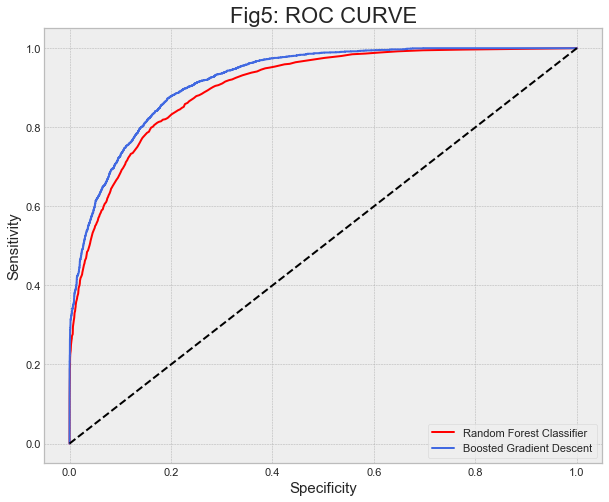

In [51]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve
models = [model_1, model_2]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'royalblue']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.title("Fig5: ROC CURVE", fontsize=22);
plt.show()

Observation 5:
The term ROC stands for Receiver Operating Characteristic. ROC curves are frequently used to show in a graphical way the connection/trade-off between sensitivity and specificity for every possible cut-off for a test or a combination of tests. The area under an ROC curve is a measure of the usefulness of a test in, where a greater area means a more useful test, the areas under ROC curves are used to compare the usefulness of tests. A test with points on the diagonal line is completely useless - non-diagnostic.

In our case, XGBoost looks slightly a better alogorithm relative to Random Forest.  However, the 2 are quite similar in accuracy levels:
- Overall accuracy between both methods are around 85%-87% and their F1 (Harmonic mean) scores was around 85% respectively.
- As anticipated, both have 91% accuracy scores for classifying <=$50K but with lower accuracy for classifying >$50K.  This is a consequence of the minority sample size for people making >$50K.  The slight imbalances that the readers were alerted to earlier is showing up in accuracy levels in predicting the >$50K class.  

**Summary:

This was a classic classification problem.  The overall raw data especially its X features were fairly clean and the y-vector was really well-defined.  The data staging was done via an internet download of the adult.csv file to mysql and then Python was connected to convert the data into a dataframe.  Data cleansing was fairly straightforward as the were a few unknown data points ("?").  The major concern was the potential of imbalanceness in the minority class, i.e., people making > $50K in the response variable or y-vector.  The people making >$50K represented only 24 percent of the sample size and could potentially caused inaccuracies during the classification process.  The statistical analytics suggested the following trend:
- Age, education and hours worked per week exhibited the normality behavior while capital gains/loss and fnlwgt were "lumpy" at best
**Suprising finds:

- Parodoxically, higher degreed people like Phds, Masters people worked longer hours relative to lower educated people
- Bachelors degreed people by far was the majority making > $50K.  
- Ex-USA, Phillipines had the 2nd highest wage earners followed by Germany and Canada 
- Blacks outpaced Asian-Pacific Islander as the 2nd highest wage earners after whites
- Race was unimportant feature in the modeling; it was ranked at the bottom tier for both algorithms

**Not suprising finds:

- Males worked longer hours than Females across all features
- White Males making over $50K made up the highest percentage followed by blacks
- By race, Asian-Pac Islanders has the highest educational levels
- USA has the highest number of people making > $50K
- Different algorithms ranked (calculate) feature importance differently
- Private industries pays most
- Being married with spouse pays most

**Conclusion:

Although both models used different methodologies to compute and rank importance features, Age, education, capital gains and fnlgwt (which is a weighted number normalized across several socio-economic factors) were ranked pretty high in level of importance for both models.  This aligned intuitively as having higher education, being older (more seniority) and capital gains (indication of wealth) were strong features in helping to predict wheather someone is making >$50K or not.
XGBoost and Random Forest both were good candidates in predicting this simple dataset.  Furthermore, we were lucky enough that their accuracy levels were similar and High enough that unbiasing techniques such as Synthetic Minority Over-sampling Technique (SMOTE), random over/under-sampling or bagging to balance out the minority class were not necessary.  Finally, the ROC curve concured that both models were useful in predicting or classifying people making over $50K.  